<a href="https://colab.research.google.com/github/yuvrajrajput/machine-learning-with-me/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from scipy.special import expit

np.random.seed(12)

Generating Data

In [ ]:
X = np.random.random(50)*105/2
e = -5*np.random.random(50) #(np.random.random(50)>0.9)*
y = (X + e )<20

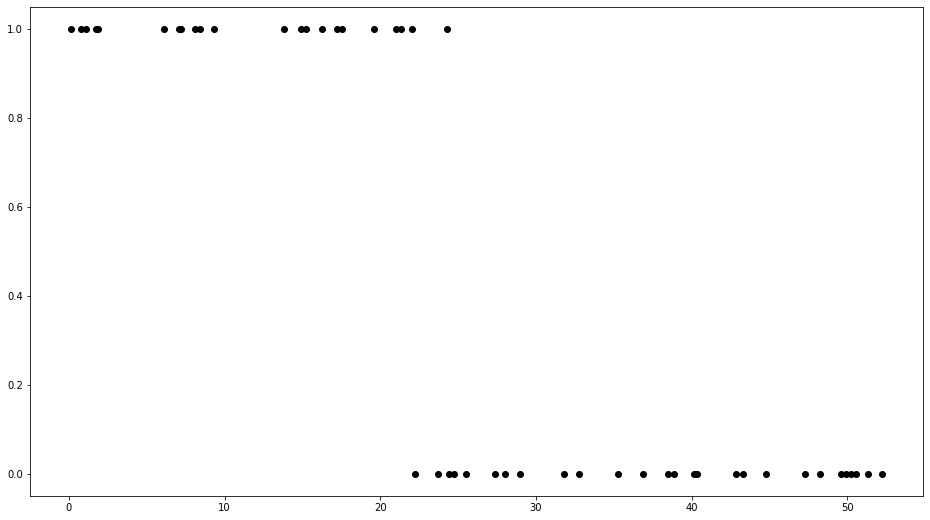

In [ ]:
# plot the data
plt.figure(1, figsize=(16, 9))
plt.clf()
plt.scatter(X, y, color='black', zorder=20)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


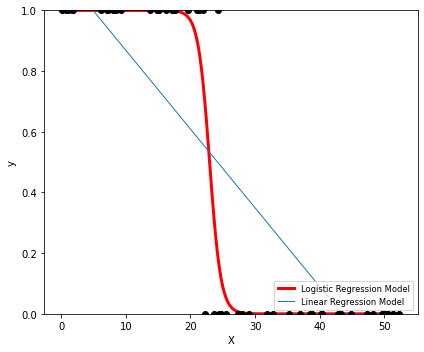

In [ ]:
# Fit the classifier
clf = LogisticRegression(C=1e5)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(6, 5))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(0, 105/2, 400)

pred = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, pred, color='red', linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
linpred = (ols.coef_ * X_test + ols.intercept_)[0]
plt.plot(X_test, linpred , linewidth=1)
#plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.ylim(0, 1)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
linpred = (ols.coef_ * X + ols.intercept_)[0]
pred = expit(X * clf.coef_ + clf.intercept_).ravel()

for thr in range(1,10,1):
  print('Threshold '+ str(thr/10))
  thr_linpred = linpred>(thr/10)
  thr_pred = pred>(thr/10)
  print('Linear Regression', (y==thr_linpred).mean(), 'Logistic Regression', (y==thr_pred).mean())

Threshold 0.1
Linear Regression 0.44 Logistic Regression 0.4976
Threshold 0.2
Linear Regression 0.44 Logistic Regression 0.5048
Threshold 0.3
Linear Regression 0.44 Logistic Regression 0.5048
Threshold 0.4
Linear Regression 0.44 Logistic Regression 0.5072
Threshold 0.5
Linear Regression 0.44 Logistic Regression 0.5072
Threshold 0.6
Linear Regression 0.44 Logistic Regression 0.5072
Threshold 0.7
Linear Regression 0.44 Logistic Regression 0.5096
Threshold 0.8
Linear Regression 0.44 Logistic Regression 0.512
Threshold 0.9
Linear Regression 0.44 Logistic Regression 0.5144
